In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.optimize import brute
import itertools

mpl.style.use('ggplot')

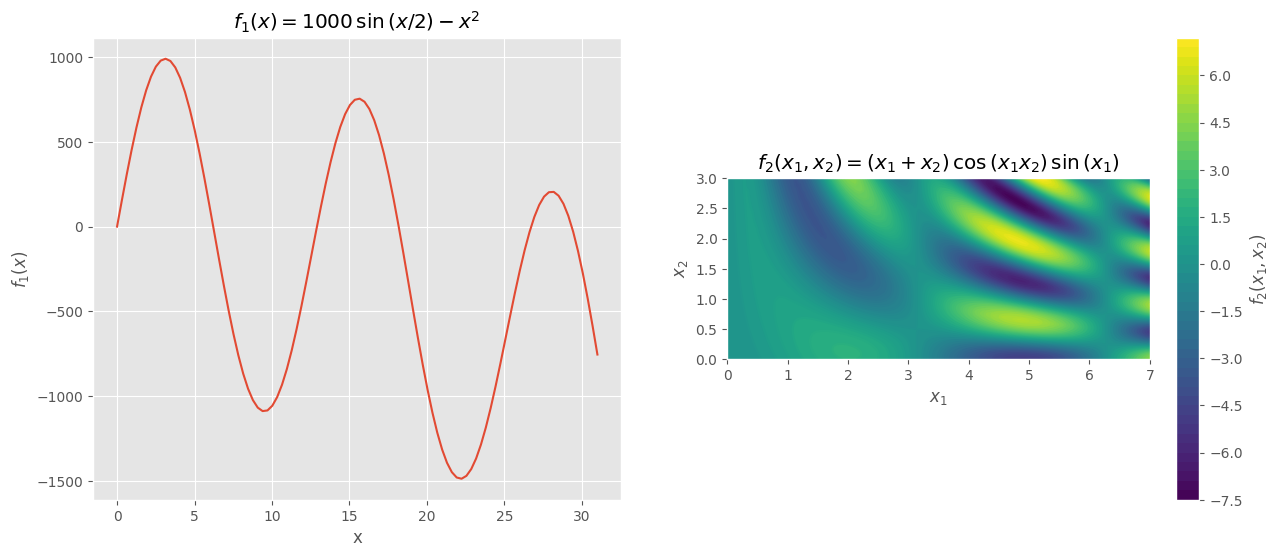

In [2]:
from optim import f1, f2

# plot f1
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
x = np.linspace(0, 31, 100)
ax[0].plot(x, f1(x))
ax[0].set_title(r'$f_1\left(x\right) = 1000\,\sin\left(x/2\right) - x^2$')
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$f_1\left(x\right)$')

# plot f2 in 3D
x1 = np.linspace(0, 7, 100)
x2 = np.linspace(0, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f2((X1, X2))
ax[1].contour(X1, X2, Z, 50)
ax[1].set_title(r'$f_2\left(x_1, x_2\right) = \left(x_1 + x_2\right)\,\cos\left(x_1 x_2\right)\,\sin\left(x_1\right)$')
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
ax[1].set_aspect('equal')
cbar = plt.colorbar(ax[1].contourf(X1, X2, Z, 50))
cbar.set_label(r'$f_2\left(x_1, x_2\right)$')
plt.savefig('plot.pdf', bbox_inches='tight')

In [3]:
def f1_minimize(x):
    return - f1(x)

result = brute(f1_minimize, (slice(0, 32, 1),), finish=None, full_output=True)
print("最適値:", -result[1])
print("最適パラメータ:", result[0])

最適値: 988.4949866040545
最適パラメータ: 3.0


In [4]:
def f2_minimize(x):
    return - f2(x)

result = brute(f2_minimize, (slice(0, 8, 1), slice(0, 4, 1)), finish=None, full_output=True)
print("最適値:", -result[1])
print("最適パラメータ:", result[0])

最適値: 5.82786544646799
最適パラメータ: [5. 3.]


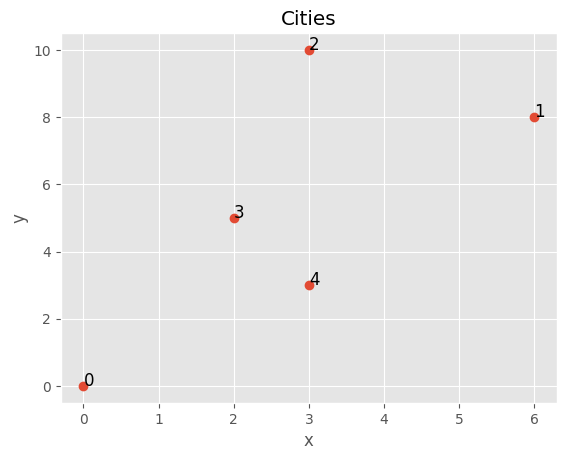

In [7]:
from TSP import CITIES, eval_cost

# plot CITIES
fig, ax = plt.subplots()
ax.plot(CITIES[:, 0], CITIES[:, 1], 'o')
ax.set_title('Cities')
# add labels to each city
for i, city in enumerate(CITIES):
    ax.text(city[0], city[1], str(i), fontsize=12)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.savefig('cities.pdf', bbox_inches='tight')

In [6]:
# 最適routeをbrute forceで求める
cities = list(range(len(CITIES)))
min_cost = float('inf')
best_route = None

for route in itertools.permutations(cities):
    cost = eval_cost(route)
    if cost < min_cost:
        min_cost = cost
        best_route = route

print(best_route, min_cost)

(0, 4, 3, 1, 2) 15.084259940083063
